In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [59]:
data = "../DataSets/iris.data"
df = pd.read_csv(data, header = None)

In [60]:
df.columns = (['sepal length', 'sepal width', 'petal length', 'petal width', 'Iris_class'])
df.head()

,sepal length,sepal width,petal length,petal width,Iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.sample(3)

,sepal length,sepal width,petal length,petal width,Iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa


In [62]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df['Iris_class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Iris_class, dtype: int64

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

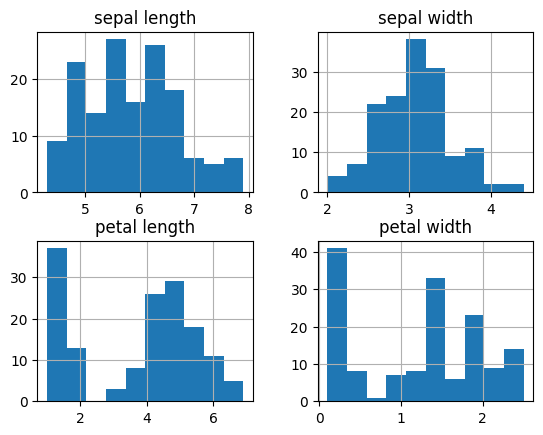

In [64]:
df.hist()

In [65]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Iris_class'],
      dtype='object')

In [66]:
x = df[['sepal length', 'sepal width', 'petal length', 'petal width']].values

In [67]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [68]:
y = df['Iris_class'].values

In [69]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [70]:
scaler = preprocessing.StandardScaler().fit(x)
x_normalize = scaler.transform(x.astype(float))

In [71]:
x_normalize[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [73]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [74]:
k = 3
iris_Knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

In [75]:
y_predicted = iris_Knn.predict(x_test)

In [76]:
y_predicted[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [77]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, iris_Knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predicted))

Train set Accuracy:  0.975
Test set Accuracy:  0.9666666666666667
